In [123]:
# Import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import hvplot.pandas
from pathlib import Path
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [109]:
# Read salary data
df = pd.read_csv('Resources/user_behavior_dataset.csv')

# Display sample data
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [110]:
# Reformat data of the independent variable X as a single-column array
X = df['User Behavior Class'].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[4],
       [3],
       [2],
       [3],
       [3]], dtype=int64)

In [111]:
# The shape of X is 700 samples, with a single feature (column)
X.shape

(700, 1)

In [112]:
# Create an array for the dependent variable y
y = df["Age"]

In [113]:
# Create a model with scikit-learn
model = LinearRegression()

In [114]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [115]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [116]:
# Create a copy of the original data
df_predicted = df.copy()

# Add a column with the predicted salary values
df_predicted["Predictions"] = predicted_y_values

# Display sample data
df_predicted.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Predictions
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,38.477987
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,38.482809
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,38.487631
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,38.482809
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,38.482809


In [117]:
# Plot data
fig1 = df_predicted.hvplot.line(
    x = "Predictions",
    y = "User Behavior Class",
    title = "Predictions"
)
fig1

:Curve   [Predictions]   (User Behavior Class)

### Logistic Regression

In [118]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [119]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [120]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [121]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.049523809523809526
Testing Data Score: 0.005714285714285714


In [122]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
310,34,25
557,34,27
307,22,45
490,22,47
514,22,54
...,...,...
73,26,50
216,22,40
694,22,34
138,22,18


### Plotting the Data

In [153]:
# Setting up theme for Seaborn
sns.set_theme('notebook')
sns.set_style("ticks")
sns.set_context("talk")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Google Pixel 5'),
  Text(1, 0, 'OnePlus 9'),
  Text(2, 0, 'Xiaomi Mi 11'),
  Text(3, 0, 'iPhone 12'),
  Text(4, 0, 'Samsung Galaxy S21'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'iOS')])

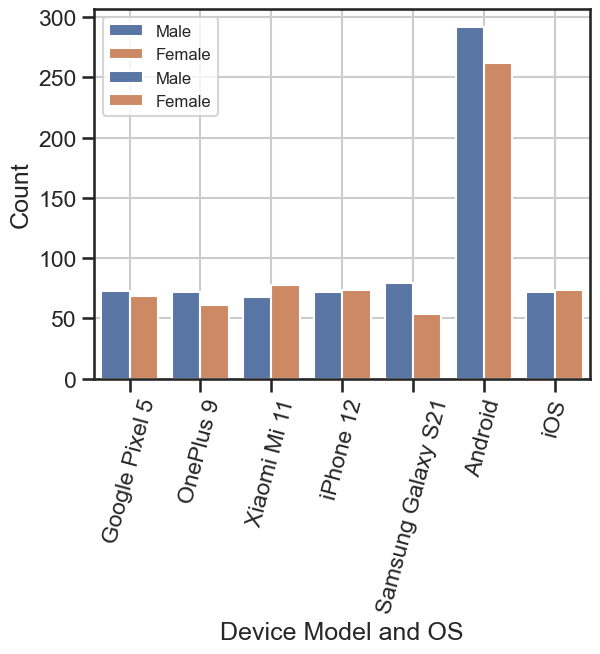

In [163]:
sns.countplot(data=df,x=df['Device Model'],hue=df['Gender'])
sns.countplot(data=df,x=df['Operating System'],hue=df['Gender'])

plt.legend(loc='upper left',fontsize=12)
plt.grid()
plt.ylabel('Count')
plt.xlabel('Device Model and OS')
plt.xticks(rotation=75)